# titanic

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('titanic')

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.head() # 문자열은 통상 categorical data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
print(df.shape)

(891, 15)


In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


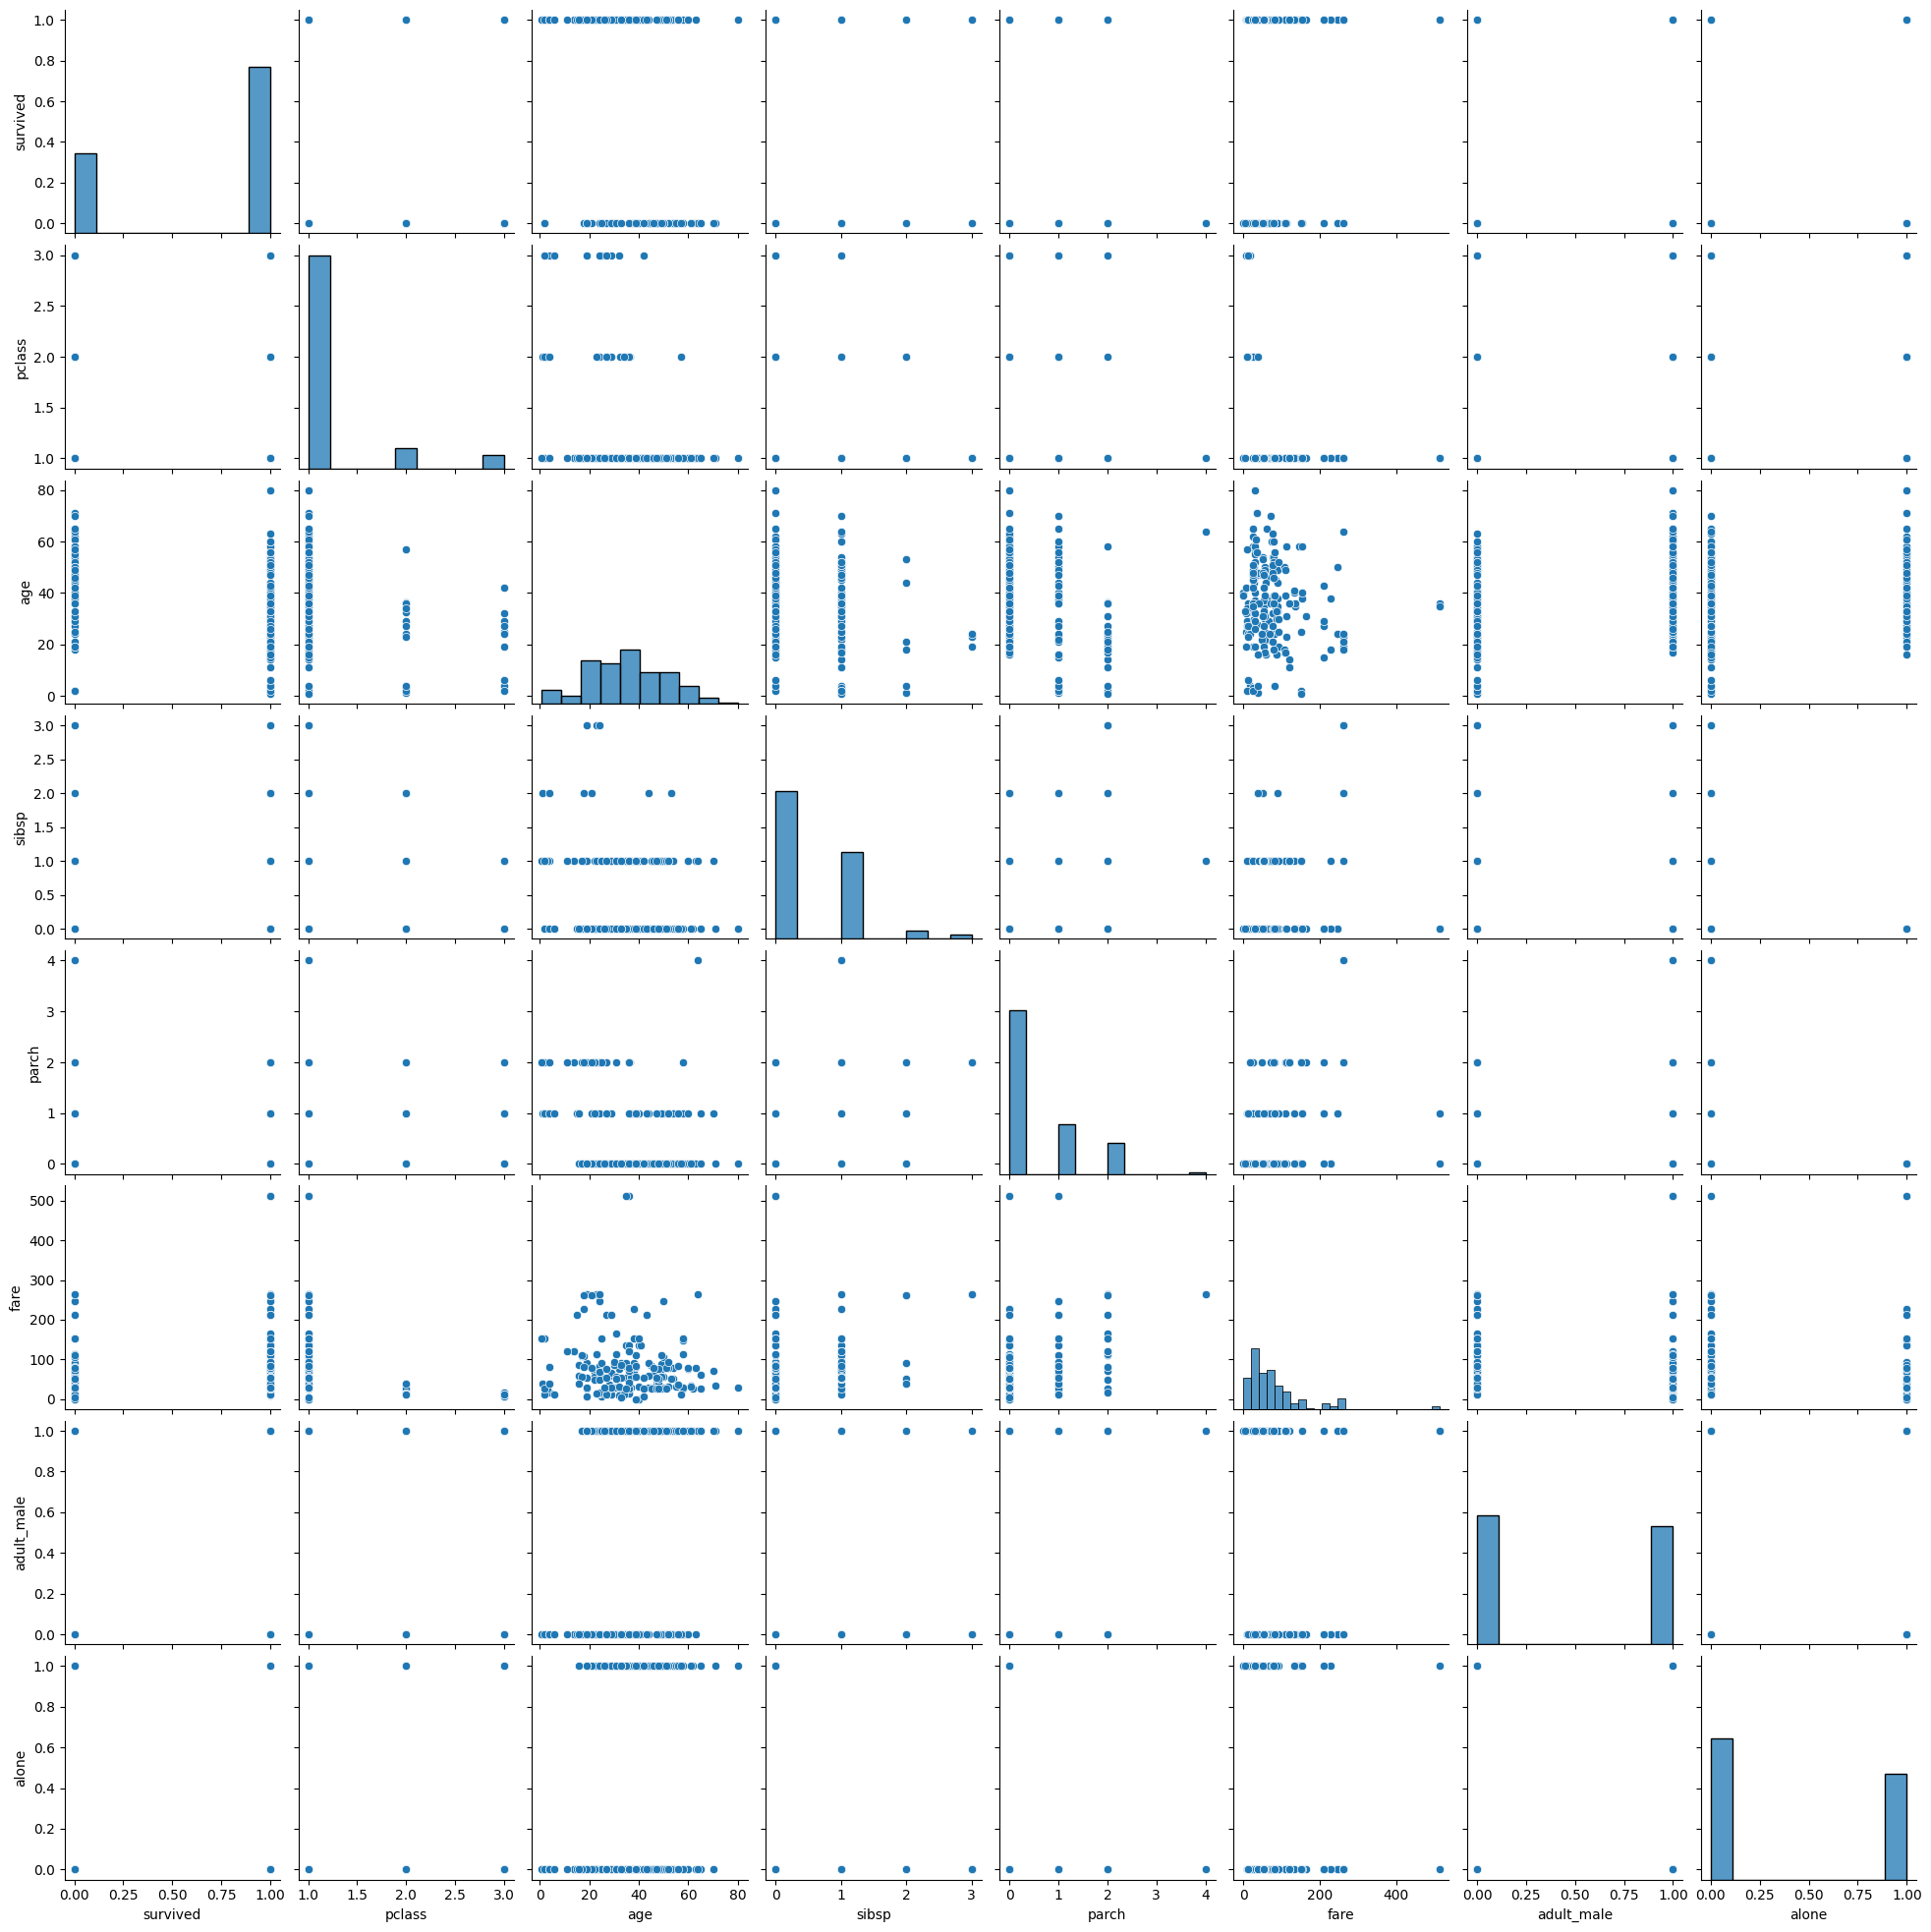

In [14]:
sns.pairplot(df)

<Axes: xlabel='sex', ylabel='survived'>

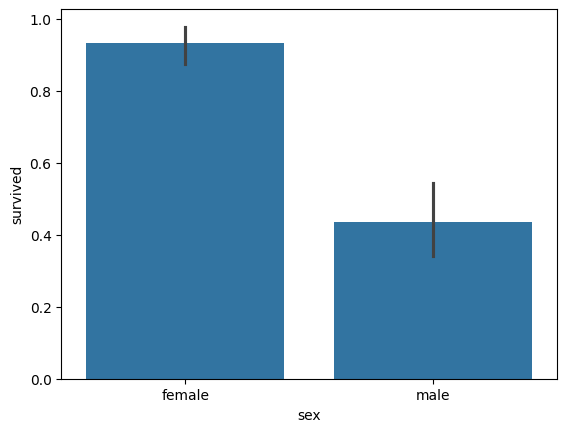

In [15]:
#from numpy import mean
#sns.barplot(x='sex', y='survived', estimator = mean, data=df) 
sns.barplot(x='sex', y='survived', data=df) # X축과 Y축을 정의하여 bar 그래프를 그린다. estimator= mean은 생략되었다.

<Axes: xlabel='sex', ylabel='fare'>

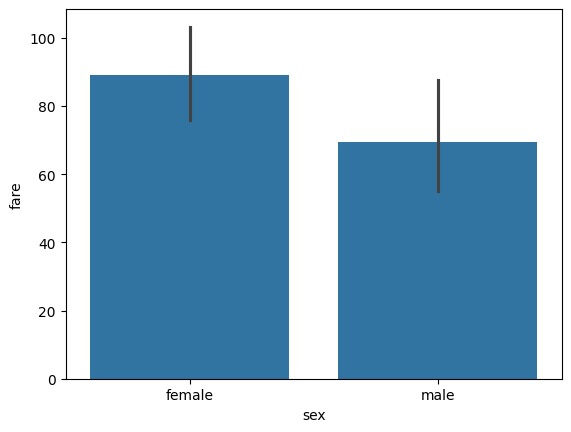

In [16]:
sns.barplot(x='sex', y='fare', data=df)

In [17]:
import pandas as pd

def agg_func(col):
    if pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col):
        return 'count'
    elif pd.api.types.is_numeric_dtype(col):
        return 'mean'
    else:
        return 'first'

# 'sex' 열을 제외한 나머지 열에 대해서만 집계를 수행합니다
columns_to_agg = [col for col in df.columns if col != 'sex']

groupedvalues = df.groupby('sex').agg({col: agg_func(df[col]) for col in columns_to_agg}).reset_index()
groupedvalues.head()

/tmp/ipykernel_13495/2659779695.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(col) or pd.api.types.is_object_dtype(col):


,sex,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,female,0.931818,1.215909,32.676136,0.534091,0.545455,89.000900,88,88,88,0.000000,88,88,88,0.363636
1,male,0.436170,1.170213,38.382128,0.404255,0.414894,69.482049,94,94,94,0.925532,94,94,94,0.489362


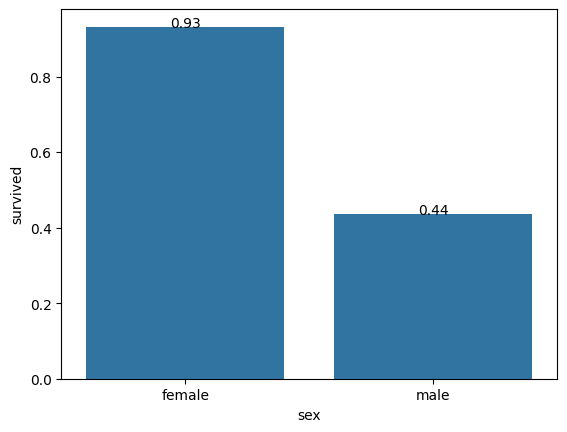

In [18]:
g = sns.barplot(x='sex',y='survived',data=groupedvalues)

for index, row in groupedvalues.iterrows():
#    print(row.name, row.survived)
    g.text(row.name, row.survived, round(row.survived, 2), color='black', ha="center") # x, y, 텍스트    

<Axes: xlabel='sex', ylabel='survived'>

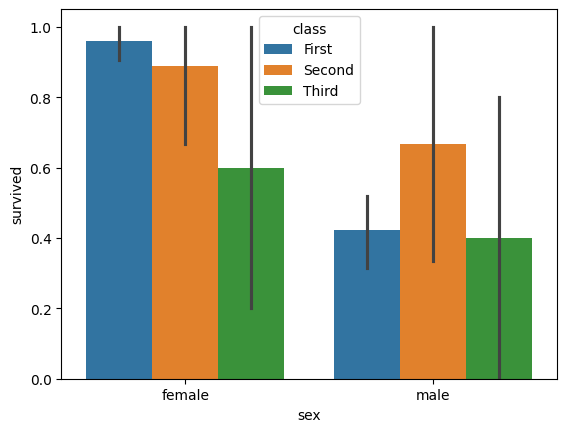

In [19]:
sns.barplot(x='sex', y='survived', hue = 'class', data=df) # hue를 설정한다. hue도 categorial value가 되어야 한다.

<Axes: xlabel='sex', ylabel='survived'>

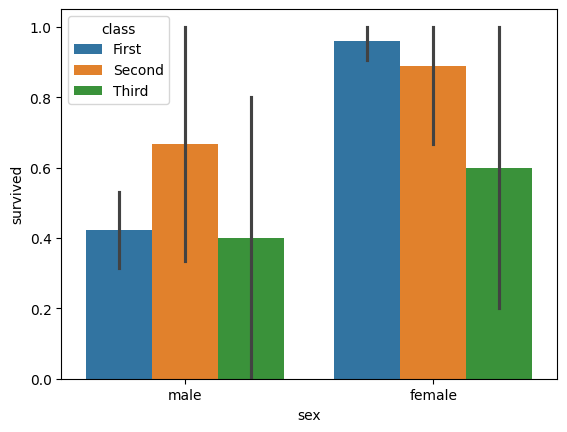

In [21]:
sns.barplot(x='sex', y='survived', hue = 'class', order = ['male', 'female'], data=df) # x축의 순서 설정

<Axes: xlabel='sex', ylabel='survived'>

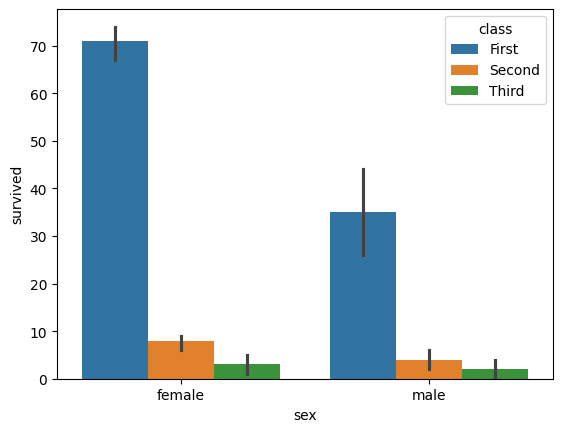

In [22]:
sns.barplot(x='sex', y='survived', hue = 'class', order = ['female', 'male'], estimator = sum, data=df) # estimator(함수) 변경

<Axes: xlabel='sex', ylabel='survived'>

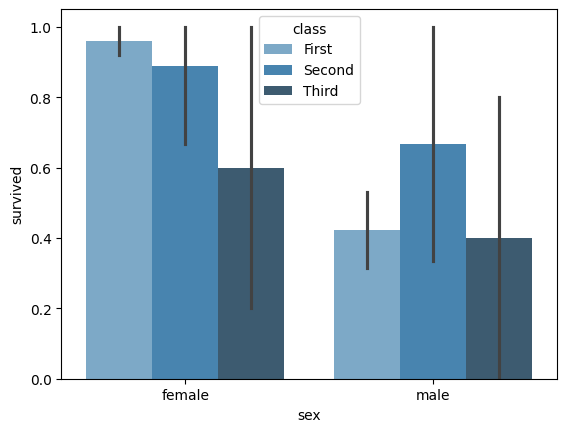

In [23]:
sns.barplot(x='sex', y='survived', hue = 'class', order = ['female', 'male'], palette="Blues_d", data=df) # 팔레트 변경

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Survival Rate')]

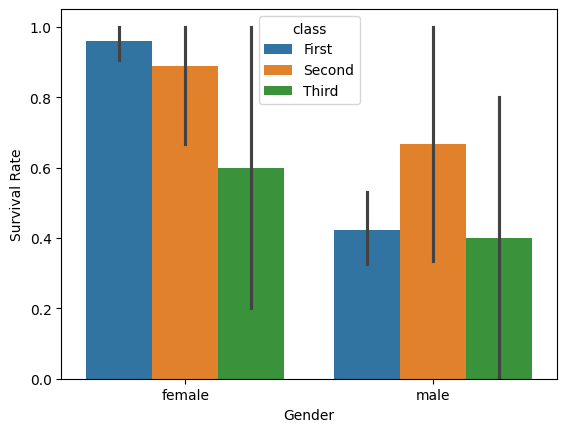

In [24]:
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = df).set(xlabel='Gender', ylabel='Survival Rate') # x, y축 텍스트 변경

Text(0.5, 1.0, 'Gender vs Survival Rate in Males and Females')

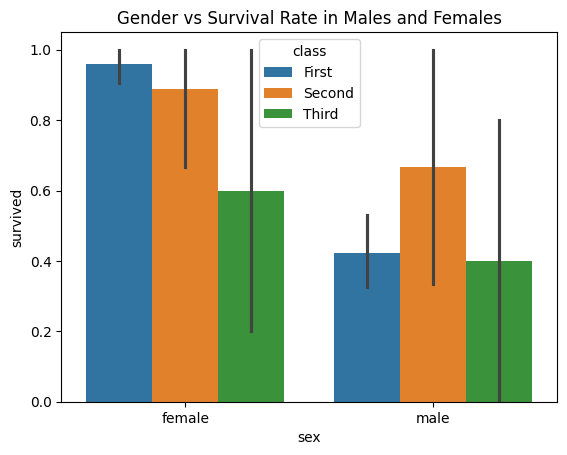

In [25]:
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = df).set_title("Gender vs Survival Rate in Males and Females") # 타이틀 변경

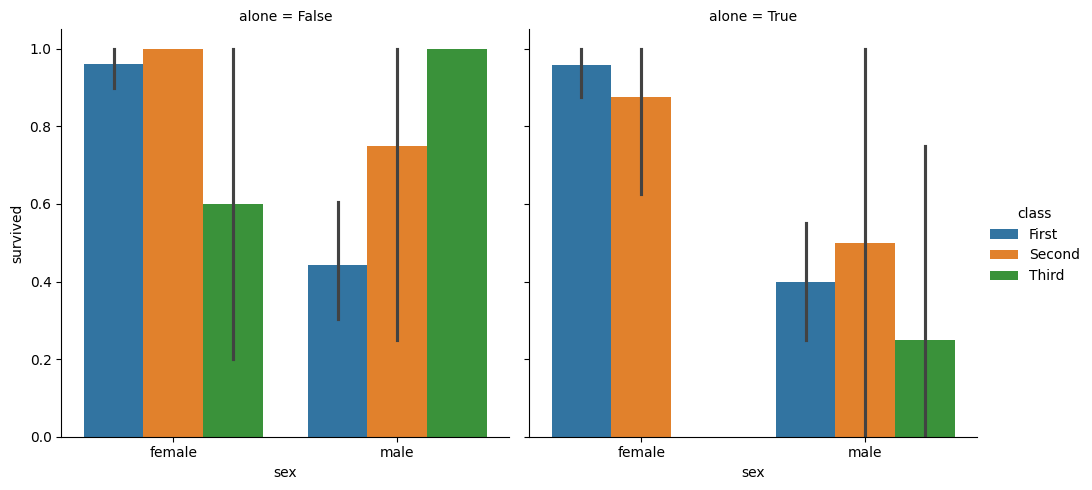

In [26]:
sns.catplot(x="sex", y="survived", hue="class", col="alone", data=df, kind="bar") 
# categorial FacetGrid를 그린다. hue와 class는 서로 교체할 수 있다.

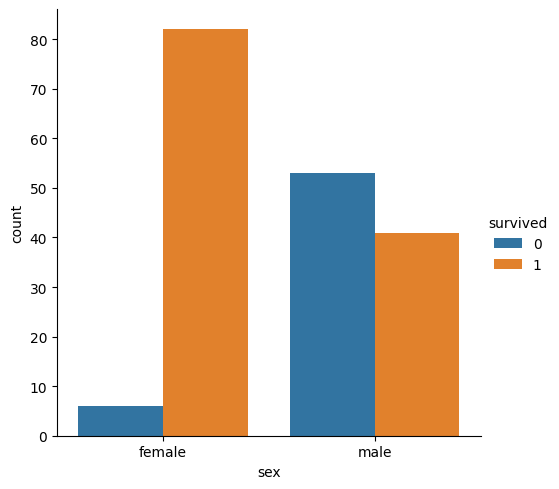

In [27]:
sns.catplot(x ="sex", hue ="survived", kind ="count", data = df) 

<Axes: xlabel='survived', ylabel='pclass'>

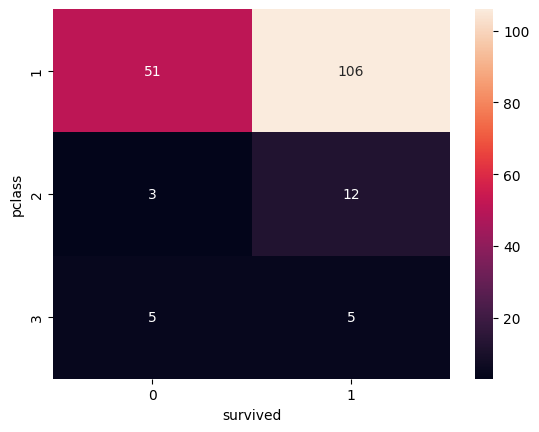

In [28]:
group = df.groupby(['pclass', 'survived']) # 등급별 생존별 데이터 그룹화
#print(group.size())
#print(group.size().unstack())
pclass_survived = group.size().unstack()  # 그룹별 카운트(NA가 아닌 것)을 세고 pivot한다
sns.heatmap(pclass_survived, annot = True, fmt='d') # 히트맵을 그리고 데이터를 정수로 표기한다

<Axes: xlabel='sex', ylabel='age'>

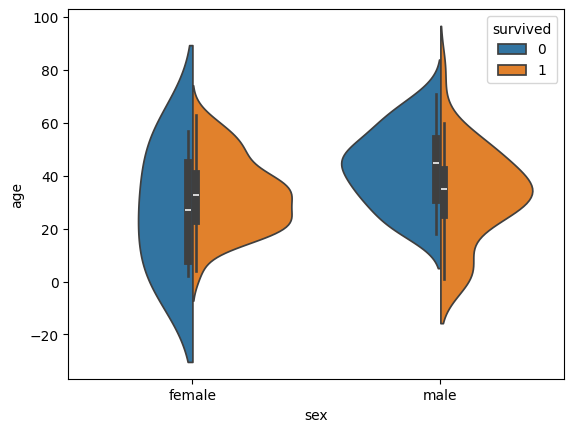

In [33]:
sns.violinplot(x ="sex", y ="age", hue ="survived", data = df, split = True) # hue를 설정하고 분포 그래프를 그린다

female age, min: 2.0, max: 63.0
male age, min: 0.92, max: 80.0


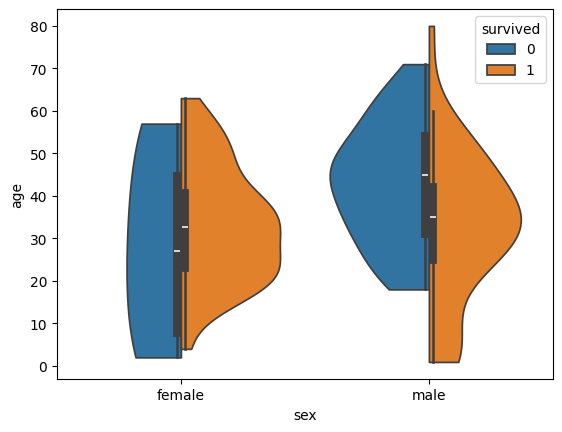

In [32]:
sns.violinplot(x ="sex", y ="age", hue ="survived", data = df, split = True, cut=0) 
female = df[df["sex"]=="female"]
male = df[df["sex"]=="male"]
print("female age, min: {}, max: {}".format(female["age"].min(), female["age"].max()))
print("male age, min: {}, max: {}".format(male["age"].min(), male["age"].max()))

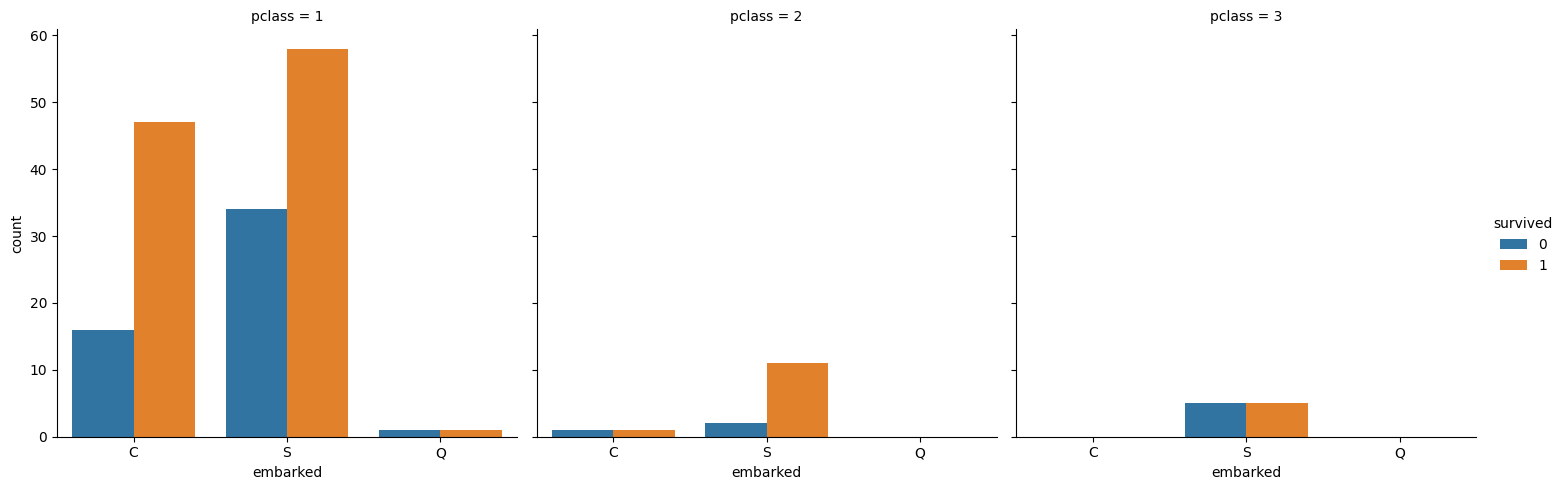

In [34]:
sns.catplot(x ='embarked', hue ='survived', kind ='count', col ='pclass', data = df) # categorical FacetGrid를 그린다.

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [37]:
print(df.sex.unique())
print(df.embarked.unique())
print(df['class'].unique())
print(df.who.unique())
print(df.deck.unique())
print(df.embark_town.unique())
print(df.alive.unique())

['female' 'male']
['C' 'S' 'Q']
['First', 'Third', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
['woman' 'man' 'child']
['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
['Cherbourg' 'Southampton' 'Queenstown']
['yes' 'no']


In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()

dfi['sex'] = label_encoder.fit_transform(dfi['sex'])
print(label_encoder.classes_)
dfi['embarked'] = label_encoder.fit_transform(dfi['embarked'])
print(label_encoder.classes_)
dfi['class'] = label_encoder.fit_transform(dfi['class'])
print(label_encoder.classes_)
dfi['who'] = label_encoder.fit_transform(dfi['who'])
print(label_encoder.classes_)
dfi['deck'] = label_encoder.fit_transform(dfi['deck'])
print(label_encoder.classes_)
dfi['embark_town'] = label_encoder.fit_transform(dfi['embark_town'])
print(label_encoder.classes_)
dfi['alive'] = label_encoder.fit_transform(dfi['alive'])
print(label_encoder.classes_)
dfi['adult_male'] = label_encoder.fit_transform(dfi['adult_male'])
print(label_encoder.classes_)
dfi['alone'] = label_encoder.fit_transform(dfi['alone'])
print(label_encoder.classes_)

['female' 'male']
['C' 'Q' 'S']
['First' 'Second' 'Third']
['child' 'man' 'woman']
['A' 'B' 'C' 'D' 'E' 'F' 'G']
['Cherbourg' 'Queenstown' 'Southampton']
['no' 'yes']
[False  True]
[False  True]


In [39]:
dfi.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
6,0,1,1,54.0,0,0,51.8625,2,0,1,1,4,2,0,1
10,1,3,0,4.0,1,1,16.7000,2,2,0,0,6,2,1,0
11,1,1,0,58.0,0,0,26.5500,2,0,2,0,2,2,1,1


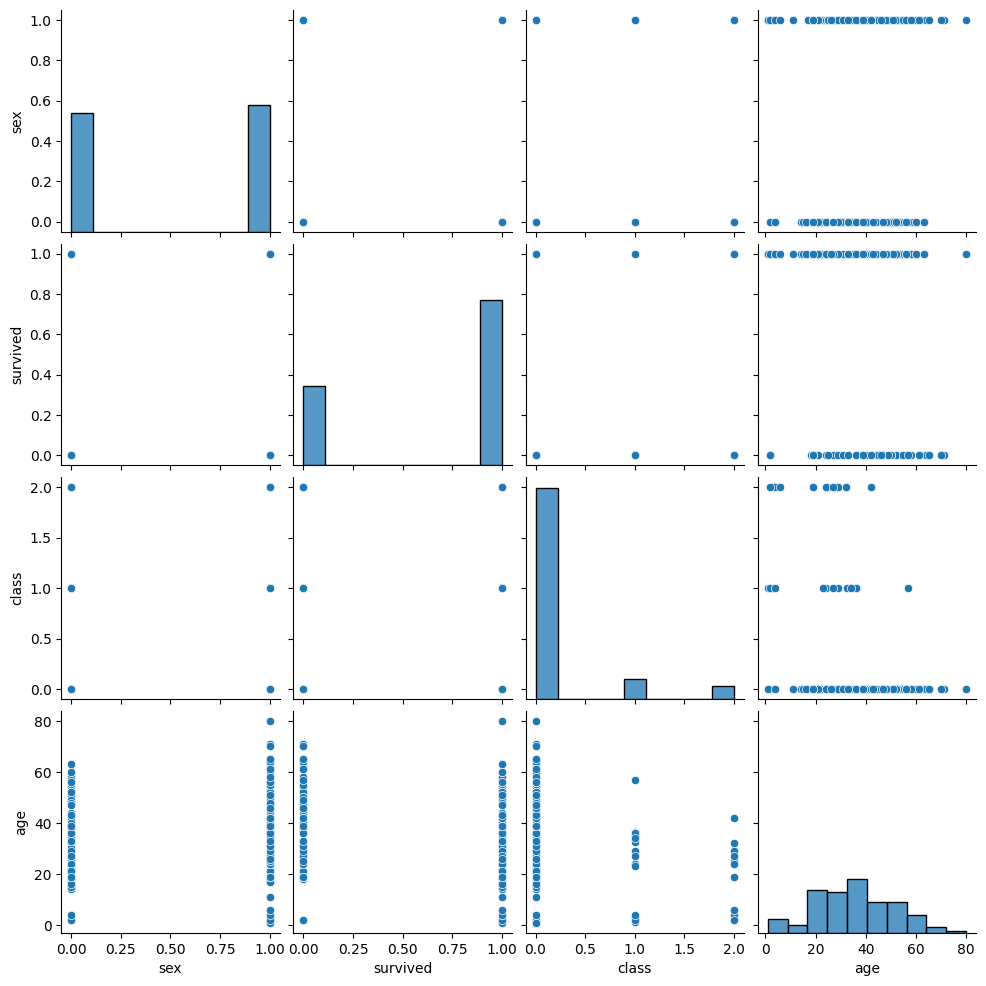

In [40]:
#dfx = pd.concat([dfi['sex'], dfi['survived'], dfi['class'], dfi['age']], axis=1)
dfx = dfi[['sex', 'survived', 'class', 'age']]
sns.pairplot(dfx)